<a href="https://colab.research.google.com/github/GabrielRamirezs/Metodos1_KarenQuevedo_GabrielRamirez/blob/main/Parcial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

Raíces de L_1(x): [1.]
Derivada cero, no se puede continuar
Raíces de L_2(x): [None 3.414213562373095]
Raíces de L_3(x): [2.29428036 2.29428036 0.        ]
Raíces de L_4(x): [0.        4.5366203 4.5366203 0.       ]
Raíces de L_5(x): [0.         3.59642577 0.         0.         0.        ]
Derivada cero, no se puede continuar


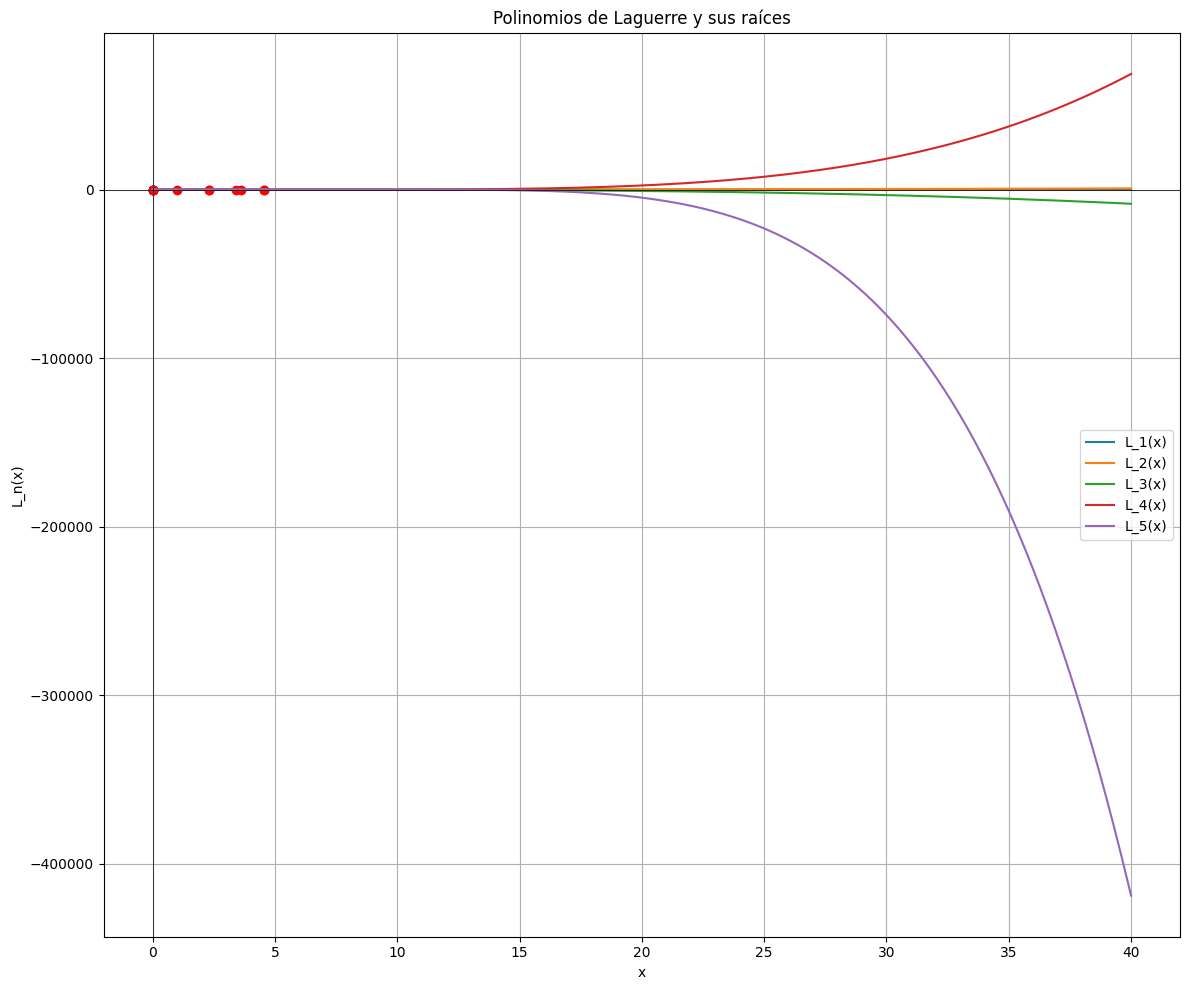

In [1]:
#5: Raíces de los primeros 5 polinomios de Laguerre
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Definir la variable simbólica
x = sp.symbols('x')

# Definir los polinomios de Laguerre usando la fórmula de Rodrigues
def laguerre(n):
    exp_part = sp.exp(x) / sp.factorial(n)
    diff_part = sp.diff((x**n) * sp.exp(-x), x, n)
    expression = exp_part * diff_part
    return expression

def newton_raphson(f, df, xn, itmax=1000, precision=1e-16):
    error = 1
    it = 0
    while error > precision and it < itmax:
        try:
            df_xn = df(xn)
            if df_xn == 0:
                print('Derivada cero, no se puede continuar')
                return None
            xn1 = xn - f(xn) / df_xn
            error = np.abs(xn1 - xn)
        except ZeroDivisionError:
            print('Error de división por cero')
            return None
        except TypeError as e:
            print(f'Error de tipo: {e}')
            return None
        except ValueError as e:
            print(f'Error de valor: {e}')
            return None
        xn = xn1
        it += 1

    if it == itmax:
        return False
    else:
        return xn

def calcular_raices_laguerre(n):
    L_n = laguerre(n)
    L_n_func = sp.lambdify(x, L_n, 'numpy')
    L_n_prime = sp.diff(L_n, x)
    L_n_prime_func = sp.lambdify(x, L_n_prime, 'numpy')

    raices = []
    for i in range(1, n+1):
        x0 = i * 2
        raiz = newton_raphson(L_n_func, L_n_prime_func, x0)
        raices.append(raiz)
    return np.array(raices)

for i in range(1, 6):
    raices = calcular_raices_laguerre(i)
    print(f"Raíces de L_{i}(x): {raices}")

x_vals = np.linspace(0, 40, 400)
plt.figure(figsize=(12, 10))

for i in range(1, 6):
    L_n = laguerre(i)
    L_n_func = sp.lambdify(x, L_n, 'numpy')
    y_vals = L_n_func(x_vals)
    raices = calcular_raices_laguerre(i)
    plt.plot(x_vals, y_vals, label=f'L_{i}(x)')
    plt.scatter(raices, [0]*len(raices), marker='o', color='red')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.title('Polinomios de Laguerre y sus raíces')
plt.xlabel('x')
plt.ylabel('L_n(x)')
plt.grid(True)
plt.tight_layout()
plt.show()


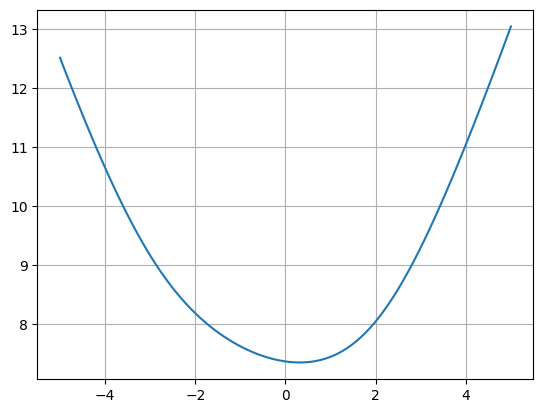

In [ ]:
#7: Minimización del camino óptico

def camino_optico(x, n0, n1, T, R):
  return n0 * np.sqrt((x - T[0])**2 + T[1]**2) + n1 * np.sqrt((x - R[0])**2 + R[1]**2)
T=(-3,2)
R=(2,-2)
n0=1
n1=1.33
x=np.linspace(-5,5,100)
y=camino_optico(x,n0,n1,T,R)
plt.plot(x,y)
plt.grid(True)

#el lugar donde se minimiza el tiempo es donde la funcion cuadratica llega a su minimo, es decir, el punto mas bajo de la curva.

In [ ]:
#7: Aproximación de la función sin(x)
x=np.array([0,np.pi/3,np.pi/2])
y=np.array([np.sin(0),np.sin(np.pi/3),np.sin(np.pi/2)])

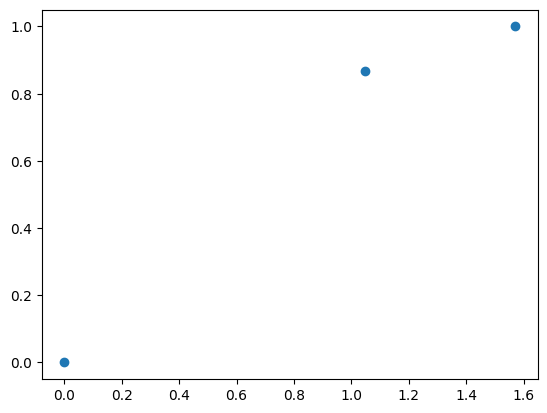

In [ ]:
 Ω=plt.scatter(x,y)

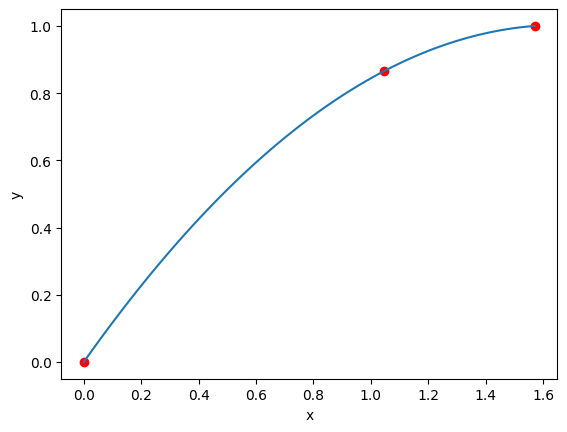

In [ ]:

def lagrange(x, y, x_val):
    n = len(x)
    resultado = 0
    for i in range(n):
        termino = y[i]
        for j in range(n):
            if i != j:
                termino *= (x_val - x[j]) / (x[i] - x[j])
        resultado += termino
    return resultado
x_ = np.linspace(0, np.pi/2, 100)
y_ = [lagrange(x, y, xi) for xi in x_]
plt.plot(x_, y_)
plt.scatter(x, y, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [ ]:
x_valor=np.pi/8
y_valor=lagrange(x,y,x_valor)
print(x_valor)
print(y_valor)


0.39269908169872414
0.4182089344431201


In [ ]:
valor_real=np.sin(x_valor)
error=np.abs(valor_real-y_valor)
print(error)

0.03552550207803029


In [ ]:
n=len(x)-1
def factorial(n):
    if n == 0:
        return 1
    else:
        respuesta = 1
        for i in range(1, n + 1):
            respuesta *= i
        return respuesta
E=(1 / factorial(n+1)) * np.prod([abs(y_valor - xi) for xi in x])
print(E)
print(error)
#no son iguales pero son del mismo orden, entonces los resultados son consistentes.

0.050531094692775655
0.03552550207803029


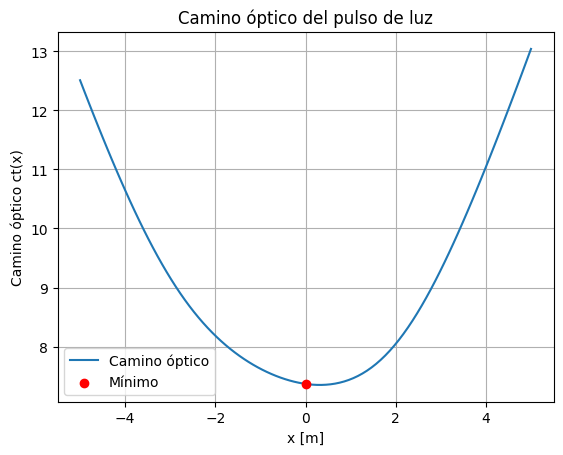

El valor de x que minimiza el tiempo de viaje es: False
Ángulo de incidencia α0: 33.690067525979785 grados
Ángulo de refracción α1: 45.0 grados


In [3]:
import numpy as np
import matplotlib.pyplot as plt


def camino_optico(x, n0, n1, T, R):
    return n0 * np.sqrt((x - T[0])**2 + T[1]**2) + n1 * np.sqrt((x - R[0])**2 + R[1]**2)


def d_camino_optico(x, n0, n1, T, R):
    term1 = (x - T[0]) / np.sqrt((x - T[0])**2 + T[1]**2)
    term2 = (x - R[0]) / np.sqrt((x - R[0])**2 + R[1]**2)
    return n0 * term1 + n1 * term2

def newton_raphson(f, df, xn, itmax=1000, precision=1e-9):
    error = 1
    it = 0
    while error > precision and it < itmax:
        try:
            df_xn = df(xn)
            if df_xn == 0:
                print('Derivada cero, no se puede continuar')
                return None
            xn1 = xn - f(xn) / df_xn
            error = np.abs(xn1 - xn)
        except ZeroDivisionError:
            print('Error de división por cero')
            return None
        except TypeError as e:
            print(f'Error de tipo: {e}')
            return None
        except ValueError as e:
            print(f'Error de valor: {e}')
            return None
        xn = xn1
        it += 1

    if it == itmax:
        return False
    else:
        return xn


T = (-3, 2)
R = (2, -2)
n0 = 1
n1 = 1.33

f = lambda x: camino_optico(x, n0, n1, T, R)
df = lambda x: d_camino_optico(x, n0, n1, T, R)


x0 = 0


xmin = newton_raphson(df, lambda x: d_camino_optico(x, n0, n1, T, R), x0)


x = np.linspace(-5, 5, 100)

y = camino_optico(x, n0, n1, T, R)

plt.plot(x, y, label='Camino óptico')
plt.scatter(xmin, camino_optico(xmin, n0, n1, T, R), color='red', zorder=5, label='Mínimo')
plt.xlabel('x [m]')
plt.ylabel('Camino óptico ct(x)')
plt.title('Camino óptico del pulso de luz')
plt.legend()
plt.grid(True)
plt.show()

print(f'El valor de x que minimiza el tiempo de viaje es: {xmin}')
# si se cumple la ley de snell
m0 = np.abs((T[1] - 0) / (T[0] - xmin))
m1 = np.abs((R[1] - 0) / (R[0] - xmin))

alpha_0 = np.arctan(m0)
alpha_1 = np.arctan(m1)

alpha_0_deg = np.degrees(alpha_0)
alpha_1_deg = np.degrees(alpha_1)

print(f'Ángulo de incidencia α0: {alpha_0_deg} grados')
print(f'Ángulo de refracción α1: {alpha_1_deg} grados')